In [2]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import string
import nltk
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

ModuleNotFoundError: No module named 'pycountry'

In [2]:
consumerKey='#fromtwitterdevaccount
consumerSecret='#fromtwitterdevaccoun
accessToken ='#fromtwitterdevaccoun
accessTokenSecret='#fromtwitterdevaccoun
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)
keyword = "India covid 19 vaccines"
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative = float(negative) + 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive = float(positive) + 1 
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral = float(neutral) + 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter how many tweets to analyze: 2500


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("Total number: ",len(tweet_list))
print("Positive number: ",len(positive_list))
print("Negative number: ", len(negative_list))
print("Neutral number: ",len(neutral_list))

Total number:  2500
Positive number:  2168
Negative number:  114
Neutral number:  218


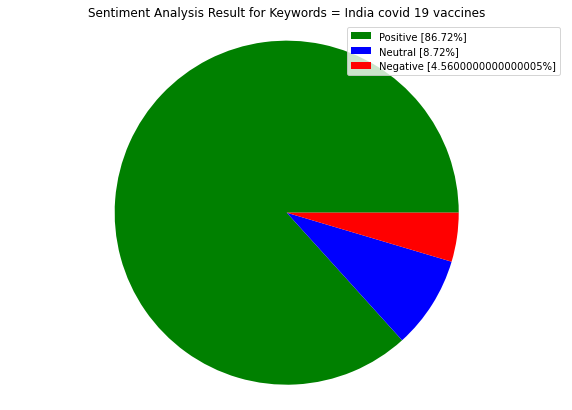

In [6]:
labels = ['Positive ['+str(len(positive_list)/len(tweet_list) * 100)+'%]' , 'Neutral ['+str(len(neutral_list)/len(tweet_list) * 100)+'%]','Negative ['+str(len(negative_list)/len(tweet_list) * 100)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'blue','red']

fig = plt.figure(figsize =(10, 7))
plt.pie(sizes, colors=colors)

plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for Keywords = "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
tweet_list.drop_duplicates(inplace = True)

In [8]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt)
tw_list["text"] = tw_list.text.str.lower()

In [9]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list.loc[index, 'sentiment'] = 'neutral'
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @mygovindia: With over 50 crore vaccines ad...,with over 50 crore vaccines administered so f...,0.300000,0.750000,negative,NaN,NaN,NaN,NaN
1,RT @samirgurav: India has now 5 approved vacci...,india has now 5 approved vaccines against cov...,0.750000,0.950000,positive,NaN,NaN,NaN,NaN
3,RT @mansukhmandviya: India expands its vaccine...,india expands its vaccine basket! \n\njohnson...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
14,RT @dhume: The US has shipped more than 110 mi...,the us has shipped more than 110 million dose...,0.166667,0.266667,negative,NaN,NaN,NaN,NaN
17,RT @RajuBistaBJP: सबको वैक्सीन – मुफ्त वैक्सीन...,सबको वैक्सीन – मुफ्त वैक्सीन!\n\nwith over 50...,0.100000,1.000000,neutral,0.0,1.0,0.0,0.0
25,RT @Arvindharmapuri: MAJOR STEP TO STRENGTHEN ...,major step to strengthen worlds largest vacci...,0.062500,0.500000,positive,NaN,NaN,NaN,NaN
26,RT @DrLahariya: With private sector administer...,with private sector administering ~7% of tota...,0.000000,0.508333,positive,NaN,NaN,NaN,NaN
92,@MilesRezz @mishasan7 @BBCWorld Since it is a ...,@milesrezz @mishasan7 @bbcworld since it is a ...,-0.166667,0.366667,negative,NaN,NaN,NaN,NaN
103,"#RahulGandhi Ji, always stood by the people an...","#rahulgandhi ji, always stood by the people an...",-0.150000,0.550000,negative,NaN,NaN,NaN,NaN
113,"RT @Sathyantweets: Vaccinate, vaccinate, vacci...","vaccinate, vaccinate, vaccinate and vaccinate...",0.000000,0.000000,neutral,0.0,1.0,0.0,0.0


In [1]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]